# Assignment 3: Web Scraping

## Q1. Scrape Movie Reviews (5 points)

- Choose one of your favorite movies and find this id of this movie at rottentomatoes.com
- Write a function getData(*movie_id*) to scrape reviews, including review date (see (2) in Figure), review description (see (1) in Figure), and score (see (3) in Figure) from the current page. 
    * Input: movie id in rottentomatoes 
    * Output: a list of 20 tuples, i.e. [("February 19, 2019", "It's a typically excellent offering from the..." , "5/5"), ...]
- Test your function with a few movies to make your function is generic enough

Example: 
- https://www.rottentomatoes.com/m/finding_dory/reviews/
- in total, 20 reviews returned
<img src="review.png">


## Q2. Plot data (5 points)
- Create a function plot_data which (overall 1 point)
  * takes the list of tuples from Q1 as an input
  * converts the ratings to numbers. For example, 3.5/5 is converted to 0.7. For all reviews without a rating or with an alphabetic rating (e.g. A), set its rating to None (2 points)
    - Hint: you can use try/except block to handle ratings which cannot be converted floats.
  * calculates the average rating by the year of the review date (1 point)
  * plots a bar chart for the average rating of each year. The plot may look similar to the figure below. (1 point)
  <img src='plot.png' width='50%'>

### Q3 (Bonus) Expand your solution to Q1 to scrape all the views for a movie.  (3 points)
- Write a function getFullData(*movie_id*) to scrape reviews in all the pages. For the example shown in Figure of Q1, reviews are organized into 16 pages (See (4) of the figure). Scrape reviews from all the 16 pages. Save the result similar to Q1.
- Note, you **should not hardcode** the number of pages, because the number of pages varies by movies. Instead, you should dynamically determine if the next review page exists or not. 

[(u' February 19, 2019', u" It's a typically excellent offering from the studio, filled with big laughs and bigger feelings.", u'5/5'), (u' February 1, 2019', u' Finding Dory is a sweet tale that will have audiences cheering our blue friend on as she "just keeps swimming."', None), (u' January 29, 2019', u' While it may not deliver the freshness of Finding Nemo, it is still overflowing with warmth, laughs, and genuine charm.', u'3.5/5'), (u' January 15, 2019', u" The animation is crisp and the visuals are sharp as this world comes to life on the big screen. There's also a nice little message about family.", u'B'), (u' December 31, 2018', u' What Finding Dory does get right is its Pixar pathos, eliciting tears at just the right moments, even when one is expecting it.', u'3/5'), (u' December 6, 2018', u' Feels more than a little familiar ... the similarities between this and its predecessor will likely make many see it as an inferior Pixar film, if there is such a thing.', u'8.9/10'), (u

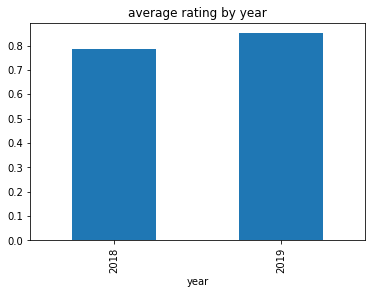

https://www.rottentomatoes.com/m/finding_dory/reviews/?page=2&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=3&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=4&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=5&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=6&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=7&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=8&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=9&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=10&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=11&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=12&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=13&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=14&sort=
https://www.rottentomatoes.com/m/finding_dory/reviews/?page=15&sort=
https://www.rottentomatoes.com/m/finding_d

In [13]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import matplotlib.pyplot as plt

 # Q1   
    
    
def scrape_page(soup):
    
    data =[]       
    
    divs=soup.select("div.review_area")
            
    for idx, div in enumerate(divs):
    
        date=None
        review=None
        score=None
            
        # get title
        review_date=div.select("div.review_date")
        if review_date!=[]:
            date=review_date[0].get_text()
            
        # get review
        review_desc=div.select("div.review_desc div.the_review")
        if review_desc!=[]:
            review=review_desc[0].get_text()
           
        # get score
        review_score=div.select("div.review_desc div.small.subtle")
        if review_score!=[]:
            score_text=review_score[0].get_text()
            if "Original Score" in score_text:
                score=score_text[(score_text.find("Original Score")+16):]

        # add title, description, and temperature as a tuple into the list
        data.append((date, review, score))
        
    return data
    
def getData(movie_id):
    
    
    data=[]
    base_url="https://www.rottentomatoes.com"
    page_url="https://www.rottentomatoes.com/m/"+movie_id+"/reviews/"

    page = requests.get(page_url) 

    if page.status_code==200:         # status_code 200 indicates success. a status code >200 indicates a failure 
        soup = BeautifulSoup(page.content, 'html.parser')
        data = scrape_page(soup)

    return data


#Q2
def getRating(s):
    result = None
    try:
        n = s.split("/")
        result = float(n[0])/float(n[1])
    except:
        pass
    return result
        
def plot_data(data):
    
    df = pd.DataFrame(data, columns=["date", "text","rating"])
    df["year"]= df.apply(lambda row: row["date"][-4:] if row["date"]!=None else None, axis=1)
    df["score"]= df.apply(lambda row: getRating(row["rating"]), axis=1)
    print(df.head())
    df.groupby("year")["score"].mean().plot.bar(title="average rating by year")
    plt.show()
                          
    
# Q3
def getFullData(movie_id):
    data=[]
    
    reviews=[]
    base_url="https://www.rottentomatoes.com"
    page_url="https://www.rottentomatoes.com/m/"+movie_id+"/reviews/"
    
    while page_url!=None:
        page = requests.get(page_url) 

        if page.status_code!=200:         # status_code 200 indicates success. a status code >200 indicates a failure 
            page_url=None
        else:
            soup = BeautifulSoup(page.content, 'html.parser')  
            data += scrape_page(soup)
            
            page_url=None
            next_page=soup.select("div.content div a.btn.btn-xs.btn-primary-rt span.glyphicon.glyphicon-chevron-right")
            #print next_page
            if next_page!=[]:
                next_url=next_page[0].parent
                page_url= base_url+next_url["href"]
                print page_url
    
    return data



if __name__ == "__main__":  
    
    # Test Q1
    data=getData("finding_dory")
    print(data)
    
    # Test Q2
    plot_data(data)
    
    # Test Q3
    data=getFullData("finding_dory")
    print(len(data), data[-1])
    plot_data(data)